In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
train = pd.read_csv('TRAIN.csv')
train.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


In [21]:
train.shape

(700, 9)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
Unnamed: 0                     700 non-null int64
gender                         700 non-null object
ethnicity                      700 non-null object
parental level of education    700 non-null object
lunch                          700 non-null object
test preparation course        700 non-null object
reading score                  700 non-null int64
writing score                  700 non-null int64
math score                     700 non-null int64
dtypes: int64(4), object(5)
memory usage: 49.3+ KB


In [23]:
train.duplicated().sum()

0

In [24]:
test = pd.read_csv('TEST.csv')
test.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,female,group C,some college,standard,none,67,72
1,1,male,group E,some college,standard,none,60,59
2,2,female,group C,bachelor's degree,standard,none,93,95
3,3,male,group D,associate's degree,standard,none,48,46
4,4,female,group B,associate's degree,standard,none,76,80


In [25]:
test.shape

(300, 8)

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
Unnamed: 0                     300 non-null int64
gender                         300 non-null object
ethnicity                      300 non-null object
parental level of education    300 non-null object
lunch                          300 non-null object
test preparation course        300 non-null object
reading score                  300 non-null int64
writing score                  300 non-null int64
dtypes: int64(3), object(5)
memory usage: 18.8+ KB


In [27]:
train = train.rename({'Unnamed: 0': 'idx'}, axis = 1)
test = test.rename({'Unnamed: 0' : 'idx'}, axis = 1)

In [28]:
train.head()

,idx,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


In [29]:
newtrain = train
newtest = test

In [30]:
newtrain = newtrain.drop('idx', axis = 1)
newtest = newtest.drop('idx', axis = 1)

In [31]:
newtrain['parental level of education'].value_counts()

some college          175
associate's degree    138
high school           134
some high school      129
bachelor's degree      81
master's degree        43
Name: parental level of education, dtype: int64

In [32]:
newtrain['ethnicity'].value_counts()

group C    219
group D    184
group B    141
group E     98
group A     58
Name: ethnicity, dtype: int64

In [33]:
newtrain['lunch'].value_counts()

standard        454
free/reduced    246
Name: lunch, dtype: int64

In [34]:
newtrain['test preparation course'].value_counts()

none         456
completed    244
Name: test preparation course, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
x = ['ethnicity', 'lunch', 'test preparation course', 'gender', 'parental level of education']
for i in x:
    newtrain[i] = le.fit_transform(newtrain[i])
    newtest[i] = le.fit_transform(newtest[i])

In [37]:
newtrain.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,1,2,4,1,1,61,62,61
1,0,2,0,1,1,62,53,53
2,0,2,4,0,0,75,70,67
3,1,2,5,0,1,76,65,79
4,1,0,2,0,1,58,44,53


In [38]:
newtest.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,2,4,1,1,67,72
1,1,4,4,1,1,60,59
2,0,2,1,1,1,93,95
3,1,3,0,1,1,48,46
4,0,1,0,1,1,76,80


In [46]:
x = newtrain.drop('math score', axis = 1)
y = newtrain['math score']

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
adab = AdaBoostRegressor()
y_pred = adab.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

6.766590034097187


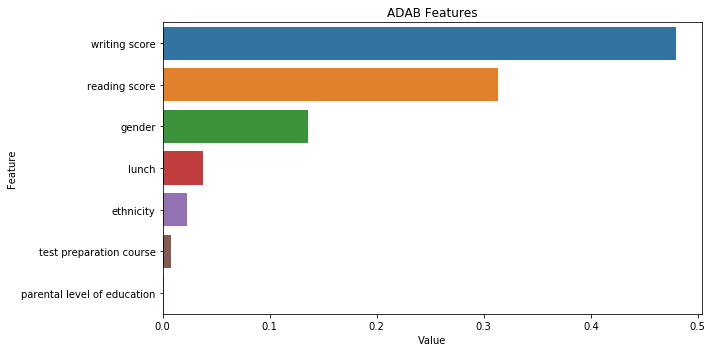

In [49]:
feature_imp = pd.DataFrame(sorted(zip(adab.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('ADAB Features')
plt.tight_layout()
plt.show()

In [57]:
x_train = newtrain.drop(['math score', 'parental level of education'], axis = 1)
y_train = newtrain['math score']
x_test = newtest.drop(['parental level of education'], axis = 1)

In [43]:
from sklearn.ensemble import AdaBoostRegressor
adab = AdaBoostRegressor()
y_pred = adab.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'idx': test.idx, 'math score' : y_pred})
solution['math score'] = solution['math score'].astype(int)
solution.to_csv('Solution.csv', index = False)